# Imports and basic plot settings

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import tree
#from sklearn.model_selection import GridSearchCV

%matplotlib notebook
sns.set()


## Define path of data file
You'll need to ***change this to your path*** (I could not upload the data file to GitHub because > 25Mb)

In [4]:
data = r'/Users/Brice/Desktop/Chronic-Disease-EDA/U.S._Chronic_Disease_Indicators.csv'

## Read the data file into a Pandas DataFrame

In [78]:
fulldf = pd.read_csv(data).infer_objects()

/Users/Brice/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Let's take a look at the top of the df

In [6]:
fulldf.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


### Wow lots of stuff going on here, let's try to get some info about how much data we're dealing with and data types.

In [7]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 34 columns):
YearStart                    403984 non-null int64
YearEnd                      403984 non-null int64
LocationAbbr                 403984 non-null object
LocationDesc                 403984 non-null object
DataSource                   403984 non-null object
Topic                        403984 non-null object
Question                     403984 non-null object
Response                     79323 non-null object
DataValueUnit                374119 non-null object
DataValueType                403984 non-null object
DataValue                    297817 non-null object
DataValueAlt                 273666 non-null float64
DataValueFootnoteSymbol      188019 non-null object
DatavalueFootnote            187853 non-null object
LowConfidenceLimit           246819 non-null float64
HighConfidenceLimit          246819 non-null float64
StratificationCategory1      403984 non-null object
Strat

In [8]:
fulldf.dropna(subset=['DataValue'], inplace=True)
fulldf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297817 entries, 0 to 403983
Data columns (total 34 columns):
YearStart                    297817 non-null int64
YearEnd                      297817 non-null int64
LocationAbbr                 297817 non-null object
LocationDesc                 297817 non-null object
DataSource                   297817 non-null object
Topic                        297817 non-null object
Question                     297817 non-null object
Response                     79284 non-null object
DataValueUnit                268822 non-null object
DataValueType                297817 non-null object
DataValue                    297817 non-null object
DataValueAlt                 273666 non-null float64
DataValueFootnoteSymbol      81852 non-null object
DatavalueFootnote            81686 non-null object
LowConfidenceLimit           246819 non-null float64
HighConfidenceLimit          246819 non-null float64
StratificationCategory1      297817 non-null object
Stratif

In [60]:
trimdf = fulldf[['LocationAbbr', 'LocationDesc', 'Question','DataValue']]
trimdf.head()

,LocationAbbr,LocationDesc,Question,DataValue
0,AK,Alaska,Alcohol use among youth,22
1,AL,Alabama,Alcohol use among youth,30.7
2,AR,Arkansas,Alcohol use among youth,27.6
3,AZ,Arizona,Alcohol use among youth,34.8
4,CA,California,Alcohol use among youth,28.9


### Trim the dataframe down even further to look at a single question

In [61]:
trimdf = trimdf[trimdf.Question == 'Alcohol use among youth']

### Take a look at what we have now

In [80]:
#sns.barplot(x='LocationAbbr', y = 'DataValue', data=trimdf)

trimdf.sample(20)

#trimdf.plot(x='LocationAbbr', y='DataValue', kind = 'bar')


,LocationAbbr,LocationDesc,Question,DataValue
277418,WV,West Virginia,Alcohol use among youth,37.1
277390,MO,Missouri,Alcohol use among youth,35.6
277386,MD,Maryland,Alcohol use among youth,31.2
4,CA,California,Alcohol use among youth,28.9
277400,NY,New York,Alcohol use among youth,32.5
277397,NJ,New Jersey,Alcohol use among youth,39.3
277410,TX,Texas,Alcohol use among youth,36.1
277372,DC,District of Columbia,Alcohol use among youth,31.4
25,MS,Mississippi,Alcohol use among youth,31.5
277411,US,United States,Alcohol use among youth,34.9


### Use a built in Pandas function (nlargest) to plot the 20 states with the highest youth alcohol use

<IPython.core.display.Javascript object>


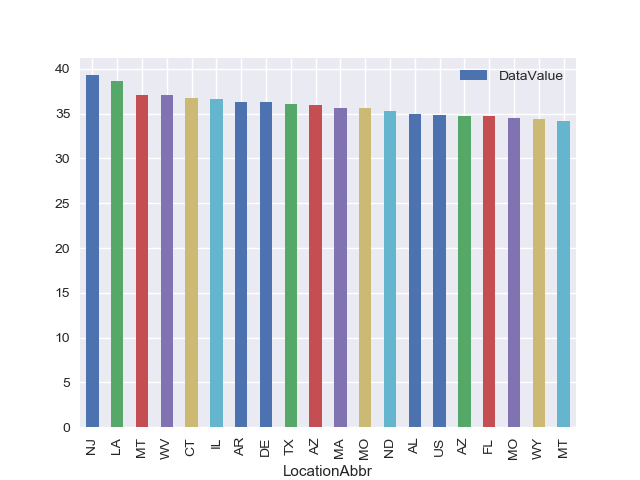

In [92]:
trimdf.DataValue = trimdf.loc[:,'DataValue'].astype(float)
myaxis = trimdf.nlargest(20,'DataValue').plot(x='LocationAbbr', y='DataValue', kind='bar')
myaxis.set_ylabel='test'
plt.show()
#trimdf.sort_values('DataValue', ascending=False).plot(x='LocationAbbr', y='DataValue', kind='bar')

### Let's sort the dataframe so that we can do more operations on it later

In [81]:
trimdf.sort_values('DataValue', ascending=False)

,LocationAbbr,LocationDesc,Question,DataValue
277397,NJ,New Jersey,Alcohol use among youth,39.3
277384,LA,Louisiana,Alcohol use among youth,38.6
277418,WV,West Virginia,Alcohol use among youth,37.1
277392,MT,Montana,Alcohol use among youth,37.1
277371,CT,Connecticut,Alcohol use among youth,36.7
277380,IL,Illinois,Alcohol use among youth,36.6
277367,AR,Arkansas,Alcohol use among youth,36.3
277373,DE,Delaware,Alcohol use among youth,36.3
277410,TX,Texas,Alcohol use among youth,36.1
277368,AZ,Arizona,Alcohol use among youth,36.0
